# Yammer

## Introduction
### Problem
The social network, Yammer, has a drop in the latest activity on the user engagement dashboards. This is an investigation of what is the causes of drop in user engagement and what are the corresponding solutions.

### Approach
Analyze the events, emails, devices by comparing the month differences to invetigate the cause of drop in engagement.

### Result


*   Users are not likly to log in the website, might be a new feature distributed in July that people don't like it.
*   The sent weekly digest emails has a drop, also the click rate has a drop. The marketing team might want to investigate the content.



## Data Preparation
### Overview of the tables

In [1]:
# Load modules
import pandas as pd
import numpy as np
from datetime import datetime, date
import matplotlib.pyplot as plt


This table includes one row per user, with descriptive information about that user’s account.
![alt text](https://github.com/jyan83/Data_Challenges/blob/master/Yammer/users.PNG?raw=true)

In [2]:
# Import user table
url = "https://raw.githubusercontent.com/jyan83/Data_Challenges/master/Yammer/yammer_users.csv"
df_users = pd.read_csv(url)
df_users.head()

,user_id,created_at,company_id,language,activated_at,state
0,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active
1,1.0,2013-01-01 13:07:46,28.0,english,NaN,pending
2,2.0,2013-01-01 10:59:05,51.0,english,NaN,pending
3,3.0,2013-01-01 18:40:36,2800.0,german,2013-01-01 18:42:02,active
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active


This table includes one row per event, where an event is an action that a user has taken on Yammer. These events include login events, messaging events, search events, events logged as users progress through a signup funnel, events around received emails.
![alt text](https://github.com/jyan83/Data_Challenges/blob/master/Yammer/events.PNG?raw=true)

In [3]:
# Import events table
url = "https://raw.githubusercontent.com/jyan83/Data_Challenges/master/Yammer/yammer_events.csv"
df_events = pd.read_csv(url)
df_events.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0


This table contains events specific to the sending of emails. It is similar in structure to the events table above.
![alt text](https://github.com/jyan83/Data_Challenges/blob/master/Yammer/emails.PNG?raw=true)

In [4]:
# Import emails table
url = "https://raw.githubusercontent.com/jyan83/Data_Challenges/master/Yammer/yammer_emails.csv"
df_emails = pd.read_csv(url)
df_emails.head()

,user_id,occurred_at,action,user_type
0,0.0,2014-05-06 09:30:00,sent_weekly_digest,1.0
1,0.0,2014-05-13 09:30:00,sent_weekly_digest,1.0
2,0.0,2014-05-20 09:30:00,sent_weekly_digest,1.0
3,0.0,2014-05-27 09:30:00,sent_weekly_digest,1.0
4,0.0,2014-06-03 09:30:00,sent_weekly_digest,1.0


The final table is a lookup table that is used to create rolling time periods. Though you could use
the INTERVAL() function, creating rolling time periods is often easiest with a table like this. You
won't necessarily need to use this table in queries that you write, but the column descriptions
are provided here so that you can understand the query that creates the chart shown above.

![alt text](https://github.com/jyan83/Data_Challenges/blob/master/Yammer/rollup.PNG?raw=true)

In [5]:
# Import Rollup Periods table
url = "https://raw.githubusercontent.com/jyan83/Data_Challenges/master/Yammer/dimension_rollup_periods.csv"
df_rollup = pd.read_csv(url)
df_rollup.head()

,period_id,time_id,pst_start,pst_end,utc_start,utc_end
0,1.0,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-01 08:00:00,2013-01-02 08:00:00
1,1.0,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-02 08:00:00,2013-01-03 08:00:00
2,1.0,2013-01-03 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-03 08:00:00,2013-01-04 08:00:00
3,1.0,2013-01-04 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-04 08:00:00,2013-01-05 08:00:00
4,1.0,2013-01-05 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00,2013-01-05 08:00:00,2013-01-06 08:00:00


### List of possible problems
* Losing old customer or new customer?
* Might be a holiday?
* Do you have a new product coming out?
* Does the marketing team changed the strategy?
* Features cannot display well in somewhere?
* Is data collected corretly?

#### Analysis 1 - Losing old customer or new customer?

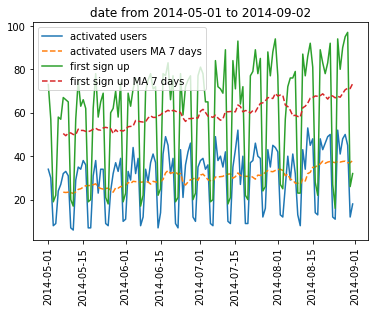

In [6]:
# Keep only date part
df_users['activated_at']= pd.to_datetime(df_users['activated_at']).dt.date
df_users['created_at']=pd.to_datetime(df_users.created_at).dt.date

# select the time period for investiagtion
time_selected=df_users[(df_users.created_at >= date(2014,5,1)) & (df_users.created_at <= date(2014,9,2))]

# Visualize the users that are active at this period & first signup users
activated_at_series=time_selected.groupby('created_at')['activated_at'].count()
user_id_series=time_selected.groupby('created_at')['user_id'].count()

plt.figure()
plt.plot(activated_at_series, label = 'activated users')
plt.plot(activated_at_series.rolling(7).mean(), linestyle = '--', label= 'activated users MA 7 days')
plt.plot(user_id_series, label = 'first sign up')
plt.plot(user_id_series.rolling(7).mean(), linestyle = '--', label= 'first sign up MA 7 days')
plt.xticks(rotation=90)
plt.title('date from ' + str(date(2014,5,1)) + ' to ' +  str(date(2014,9,2)))
plt.legend(loc='best')
plt.show()

From the above plot, it can be seen that both new and old customers have dropped around the beginning of Aug. We can group all of these customers together to see what is the cause.

#### Analysis 2 - Might be a holiday?

In [7]:
# Import holidays
import holidays
US_holidays = sorted(holidays.US(years=2014).items())
US_holidays

[(datetime.date(2014, 1, 1), "New Year's Day"),
 (datetime.date(2014, 1, 20), 'Martin Luther King, Jr. Day'),
 (datetime.date(2014, 2, 17), "Washington's Birthday"),
 (datetime.date(2014, 5, 26), 'Memorial Day'),
 (datetime.date(2014, 7, 4), 'Independence Day'),
 (datetime.date(2014, 9, 1), 'Labor Day'),
 (datetime.date(2014, 10, 13), 'Columbus Day'),
 (datetime.date(2014, 11, 11), 'Veterans Day'),
 (datetime.date(2014, 11, 27), 'Thanksgiving'),
 (datetime.date(2014, 12, 25), 'Christmas Day')]

No holiday near Aug, thus, it is not caused by holiday event.

#### Analysis 3 Do you have a new product coming out?

Notice that there are several devices that used to log the event.


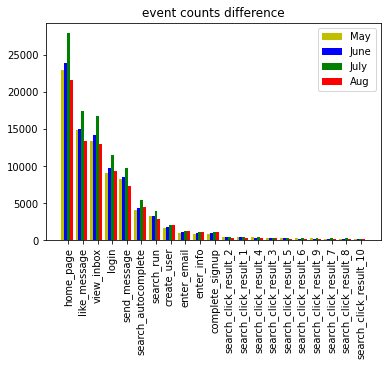

In [8]:
# get the list of events
event_list = set(df_events['event_name'])

# transfer dates
df_events['occurred_at']= pd.to_datetime(df_events['occurred_at']).dt.date

# select the time period for investiagtion
time_selected_5 = df_events[(df_events.occurred_at >= date(2014,5,1)) & (df_events.occurred_at <= date(2014,6,1))]
time_selected_6 = df_events[(df_events.occurred_at >= date(2014,6,1)) & (df_events.occurred_at <= date(2014,7,1))]
time_selected_7 = df_events[(df_events.occurred_at >= date(2014,7,1)) & (df_events.occurred_at <= date(2014,8,1))]
time_selected_8 = df_events[(df_events.occurred_at >= date(2014,8,1)) & (df_events.occurred_at <= date(2014,9,1))]

# get the events counts at the selected months
activated_at_series_5=time_selected_5['event_name'].value_counts()
activated_at_series_6=time_selected_6['event_name'].value_counts()
activated_at_series_7=time_selected_7['event_name'].value_counts()
activated_at_series_8=time_selected_8['event_name'].value_counts()

x = np.arange(len(event_list))
ax = plt.subplot(111)
plt.bar(x-0.4, activated_at_series_5.values, width=0.2, color='y', align='center')
plt.bar(x-0.2, activated_at_series_6.values, width=0.2, color='b', align='center')
plt.bar(x,activated_at_series_7.values, width=0.2, color='g', align='center')
plt.bar(x+0.2, activated_at_series_8.values, width=0.2, color='r', align='center')
plt.xticks(x, activated_at_series_5.index)
plt.xticks(rotation=90)
plt.title('event counts difference')
plt.legend(('May','June', 'July', 'Aug'))
plt.show()

It is seen from the difference that the between July and Aug, user loads the home page significant dropped which respresents that people don't want to log in. Also, there is a spike from June to July. Following some important features that reflects the user engagements indicate the same pattern. There is a possibility that some new function has been published in July, but users spent some effort to try the new features but don't like it and left.

#### Analysis 4  Does the marketing team changed the strategy?
From the given tables, marketing team may send emails to attract new and old customers. Investigate the emails events and what are the actions might help gain insight.


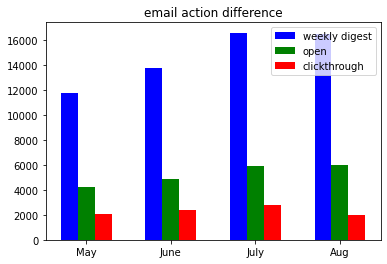

In [9]:
## Email
df_emails['occurred_at']= pd.to_datetime(df_emails['occurred_at']).dt.date

# preset actions values for the four months
weekly = []
email_open = []
email_click = []

# get the action counts for the four months
for i in range(4):
    if i == 0:
        emails = df_emails[(df_emails.occurred_at >= date(2014,5,1)) & (df_emails.occurred_at <= date(2014,6,1))]
    elif i == 1:
        emails = df_emails[(df_emails.occurred_at >= date(2014,6,1)) & (df_emails.occurred_at <= date(2014,7,1))]
    elif i == 2:
        emails = df_emails[(df_emails.occurred_at >= date(2014,7,1)) & (df_emails.occurred_at <= date(2014,8,1))]
    elif i == 3:
        emails = df_emails[(df_emails.occurred_at >= date(2014,8,1)) & (df_emails.occurred_at <= date(2014,9,1))]
    weekly.append(emails[emails['action'] == 'sent_weekly_digest'].user_id.size)
    email_open.append(emails[emails['action'] == 'email_open'].user_id.size)
    email_click.append(emails[emails['action'] == 'email_clickthrough'].user_id.size)

# plot
x = np.arange(4)
ax = plt.subplot(111)
plt.bar(x-0.2, weekly, width=0.2, color='b', align='center')
plt.bar(x, email_open, width=0.2, color='g', align='center')
plt.bar(x+0.2, email_click, width=0.2, color='r', align='center')
plt.xticks(x, ('May','June', 'July', 'Aug'))
plt.xticks(rotation = 0)
plt.title('email action difference')
plt.legend(('weekly digest', 'open', 'clickthrough'))
plt.show()

Following the growth pattern, weekly digest should increase. The truth is in August, the sent weekly digest is the same as the last month in July. The marketing team should check if some customers have been missed. The open rate is almost the same, but the clickthrough rate has siginificant decreased. The marketing team might also need to check their content.

#### Analysis 5  Features cannot display well in somewhere?
Notice that there are several devices to display, there is a possibility that some features cannot display well in some devices.


In [10]:
device = df_events[(df_events.event_type=='engagement')]
device.device.unique()


array(['dell inspiron notebook', 'iphone 5', 'iphone 4s',
       'windows surface', 'macbook air', 'iphone 5s', 'macbook pro',
       'kindle fire', 'ipad mini', 'nexus 7', 'nexus 5',
       'samsung galaxy s4', 'lenovo thinkpad', 'samsumg galaxy tablet',
       'acer aspire notebook', 'asus chromebook', 'samsung galaxy note',
       'mac mini', 'hp pavilion desktop', 'ipad air', 'htc one',
       'dell inspiron desktop', 'amazon fire phone',
       'acer aspire desktop', 'nokia lumia 635', 'nexus 10'], dtype=object)

There are several devices to choose, group them intor three categories: mobile, desktop, tablets. Also, based on the system, categoried into IOS, Windows, and Android.

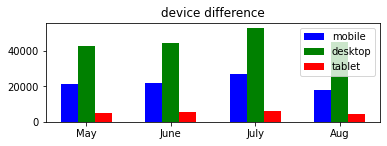

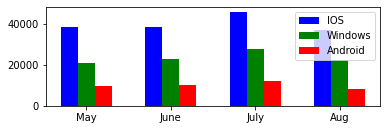

In [11]:
# get categories of devices
device = df_events[(df_events.event_type=='engagement')]
device.device.unique()

phone = ['iphone 5', 'iphone 4s', 'iphone 5s', 'samsung galaxy s4', 'htc one', 'amazon fire phone', 'nokia lumia 635']
desktop =['dell inspiron notebook', 'windows surface', 'macbook air', 'macbook pro', 'lenovo thinkpad', 'mac mini', 'hp pavilion desktop', 'dell inspiron desktop', 'acer aspire desktop']
tablet = ['windows surface', 'samsumg galaxy tablet', 'ipad air', 'nexus 10']

IOS = ['iphone 5', 'iphone 4s', 'iphone 5s', 'macbook air', 'macbook pro', 'mac mini', 'ipad air']
Windows = ['dell inspiron notebook', 'windows surface', 'lenovo thinkpad', 'hp pavilion desktop', 'dell inspiron desktop', 'acer aspire desktop', 'windows surface']
Android = ['samsung galaxy s4', 'htc one', 'amazon fire phone', 'nokia lumia 635', 'samsumg galaxy tablet', 'nexus 10']


phone_count = []
desktop_count = []
tablet_count = []
IOS_count = []
Windows_count = []
Android_count = []

# get the action counts for the four months
for i in range(4):
    if i == 0:
        time_selected = time_selected_5
    elif i == 1:
        time_selected = time_selected_6
    elif i == 2:
        time_selected = time_selected_7
    elif i == 3:
        time_selected = time_selected_8
    phone_count.append(np.sum([x == time_selected['device'] for x in phone]))
    desktop_count.append(np.sum([x == time_selected['device'] for x in desktop]))
    tablet_count.append(np.sum([x == time_selected['device'] for x in tablet]))
    IOS_count.append(np.sum([x == time_selected['device'] for x in IOS]))
    Windows_count.append(np.sum([x == time_selected['device'] for x in Windows]))
    Android_count.append(np.sum([x == time_selected['device'] for x in Android]))

# plot
x = np.arange(4)
ax = plt.subplot(211)
plt.bar(x-0.2, phone_count, width=0.2, color='b', align='center')
plt.bar(x, desktop_count, width=0.2, color='g', align='center')
plt.bar(x+0.2, tablet_count, width=0.2, color='r', align='center')
plt.xticks(x, ('May','June', 'July', 'Aug'))
plt.xticks(rotation = 0)
plt.title('device difference')
plt.legend(('mobile', 'desktop', 'tablet'))
plt.show()

ax = plt.subplot(212)
plt.bar(x-0.2, IOS_count, width=0.2, color='b', align='center')
plt.bar(x, Windows_count, width=0.2, color='g', align='center')
plt.bar(x+0.2, Android_count, width=0.2, color='r', align='center')
plt.xticks(x, ('May','June', 'July', 'Aug'))
plt.xticks(rotation = 0)
plt.legend(('IOS', 'Windows', 'Android'))
plt.show()

All of them has a decrease in Aug, thus, the debice cannot be diagnosed of the user engagement trend.